# Capturing Output With <tt>%%capture</tt>

IPython has a [cell magic](Cell Magics.ipynb), `%%capture`, which captures the stdout/stderr of a cell. With this magic you can discard these streams or store them in a variable.

In [1]:
from __future__ import print_function
import sys

By default, `%%capture` discards these streams.  This is a simple way to suppress unwanted output.

In [2]:
%%capture
print('hi, stdout')
print('hi, stderr', file=sys.stderr)

If you specify a name, then stdout/stderr will be stored in an object in your namespace.

In [3]:
%%capture captured
print('hi, stdout')
print('hi, stderr', file=sys.stderr)

In [4]:
captured

Calling the object writes the output to stdout/stderr as appropriate.

In [5]:
captured()

hi, stdout


hi, stderr


In [6]:
captured.stdout

'hi, stdout\n'

In [7]:
captured.stderr

'hi, stderr\n'

`%%capture` grabs all output types, not just stdout/stderr, so you can do plots and use IPython's display system inside `%%capture`

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [9]:
%%capture wontshutup

print("setting up X")
x = np.linspace(0,5,1000)
print("step 2: constructing y-data")
y = np.sin(x)
print("step 3: display info about y")
plt.plot(x,y)
print("okay, I'm done now")

setting up X
step 2: constructing y-data
step 3: display info about y
okay, I'm done now


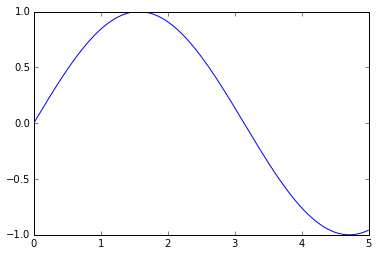

In [10]:
wontshutup()

And you can selectively disable capturing stdout, stderr or rich display, by passing `--no-stdout`, `--no-stderr` and `--no-display`

In [11]:
%%capture cap --no-stderr
print('hi, stdout')
print("hello, stderr", file=sys.stderr)

hello, stderr


In [12]:
cap.stdout

'hi, stdout\n'

In [13]:
cap.stderr

''

In [14]:
cap.outputs

[]